# Introduction

Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates.

Context of our Dataset: Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

# Our Goals

Do a exploratory analysis of the Recruitment dataset

Do an visualization analysis of the Recruitment dataset

Prediction: To predict whether a student got placed or not using classification models

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split


In [2]:
#loading the dataset and exploring the data

df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Inference

We have Gender and Educational qualification data

We have all the educational performance(score) data

We have the status of placement and salary details

We can expect null values in salary as candidates who weren't placed would have no salary

Status of placement is our target variable rest of them are independent variable except salary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.shape

(215, 15)

In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
#checking for the missing values

df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Inference

There are 67 null values in our data, which means 67 unhired candidates.

We can't drop these values as this will provide a valuable information on why candidates failed to get hired.

We can't impute it with mean/median values and it will go against the context of this dataset and it will show unhired candidates got salary.

Our best way to deal with these null values is to impute it with '0' which shows they don't have any income

### Data Cleaning

In [7]:
#Handling the missing values

df['salary'].fillna(value = 0 , inplace = True)


In [8]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
#dropping the unwanted features

df.drop(['sl_no','ssc_b','hsc_b'] , axis = 1 , inplace  =True)

C:\Users\hp\AppData\Local\Temp\ipykernel_13332\2932182380.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Employability percentage')

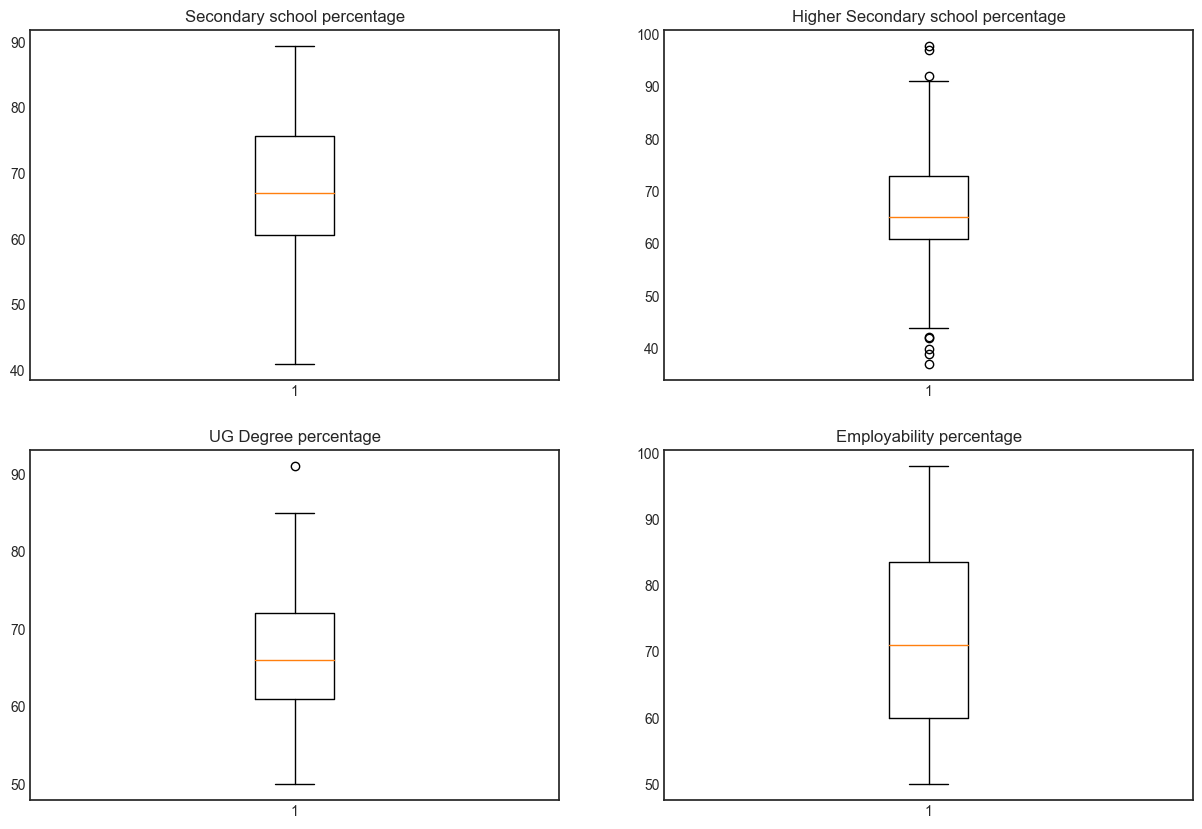

In [10]:
#Checking the Outliers

plt.figure(figsize=(15,10))
plt.style.use('seaborn-white')
ax=plt.subplot(2,2,1)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(2,2,2)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(2,2,3)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(2,2,4)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage')

As you see, we have very less number of outliers in our features. 
Especially we have majority of the outliers in hsc percentage Let's clear them up!

In [11]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)

IQR = Q3 - Q1 #Interquartile range

filter = (df['hsc_p'] >= Q1-1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 * IQR)

df_filter = df.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

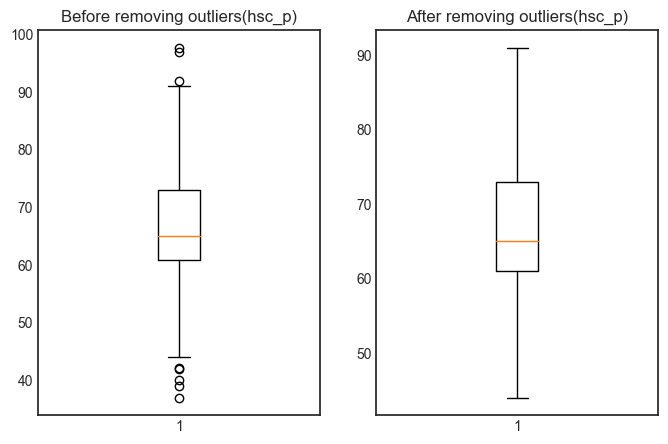

In [12]:
plt.figure(figsize=(8,5))
ax = plt.subplot(1,2,1)
plt.boxplot(df['hsc_p'])
plt.title('Before removing outliers(hsc_p)')

ax = plt.subplot(1,2,2)
plt.boxplot(df_filter['hsc_p'])
plt.title('After removing outliers(hsc_p)')

### Exploratory Data Analysis

##### Count of categorical features- Count plot

In [13]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


C:\Users\hp\AppData\Local\Temp\ipykernel_13332\1008568547.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


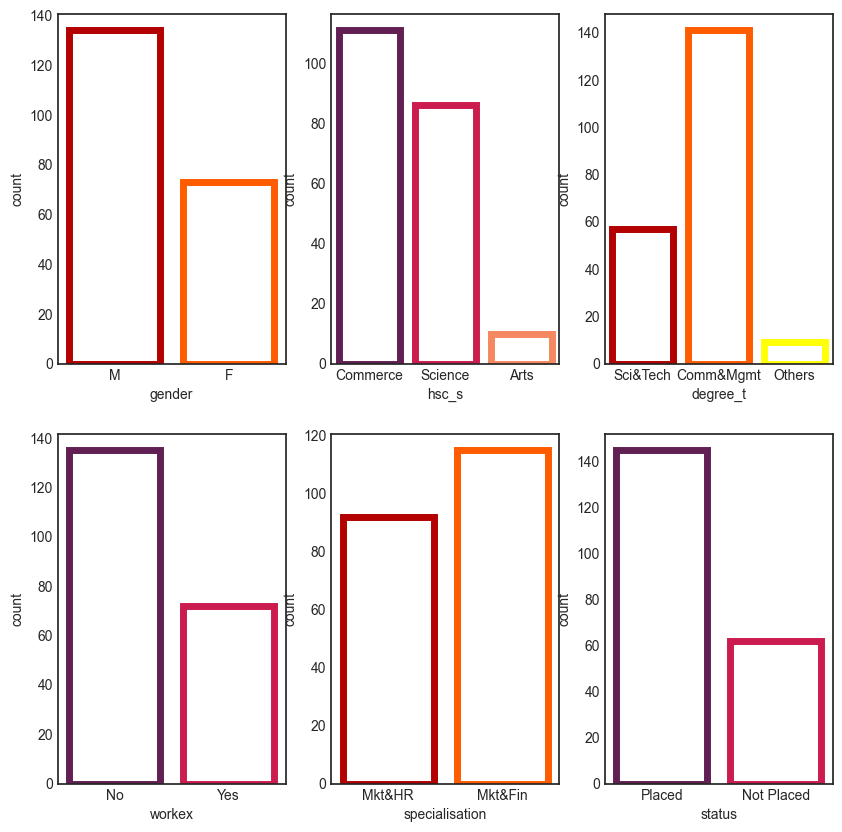

In [14]:

plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')

plt.subplot(231)
ax=sns.countplot(x="gender", data=df_filter, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=df_filter, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)


plt.subplot(233)
ax=sns.countplot(x="degree_t", data=df_filter, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
ax=sns.countplot(x="workex", data=df_filter, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
ax=sns.countplot(x="specialisation", data=df_filter, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
ax=sns.countplot(x="status", data=df_filter, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)


Inference

We have more male candidates than female

We have candidates who did commerce as their hsc course and as well as undergrade

Science background candidates are the second highest in both the cases

Most of our candidates from our dataset don't have any work experience

Candidates from Marketing and Finance dual specialization are high

Most of our candidates from our dataset got placed in a company

##### Distribution Salary- Placed Students

C:\Users\hp\AppData\Local\Temp\ipykernel_13332\2512622524.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_placed["salary"])


<Axes: xlabel='salary', ylabel='Density'>

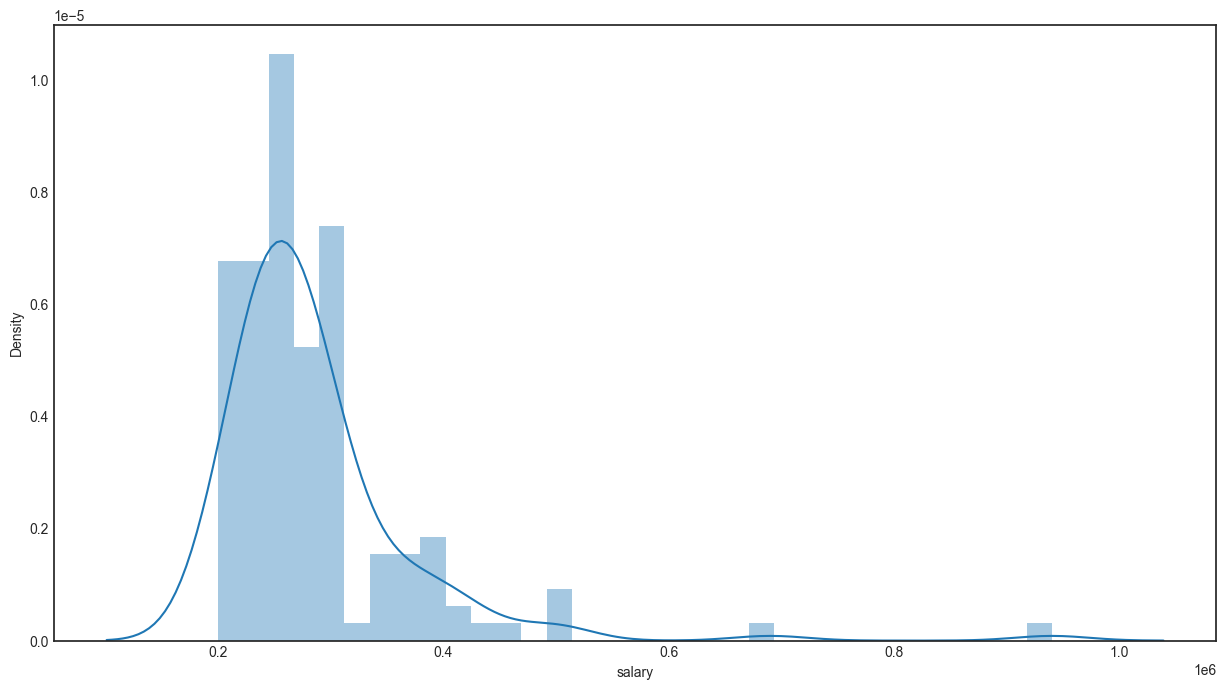

In [15]:
plt.figure(figsize=(15,8))
df_placed = df_filter[df_filter.salary != 0]
sns.distplot(df_placed["salary"])


Inference

Many candidates who got placed received package between 2L-4L PA

Only one candidate got around 10L PA

The average of the salary is a little more than 2LPA

##### Employability score vs Salary- Joint plot

<Figure size 1000x800 with 0 Axes>

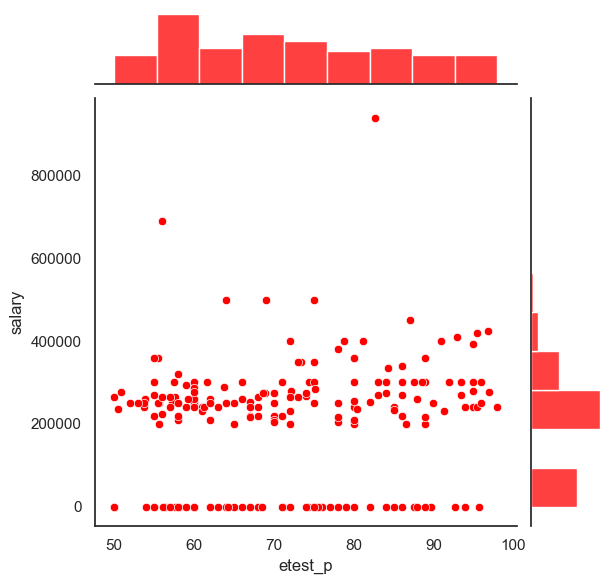

In [16]:
plt.figure(figsize=(10,8))
sns.set(style="white", color_codes=True)
sns.jointplot(x=df_filter["etest_p"], y=df_filter["salary"], kind='scatter', color="red")

Inference

Most of the candidates scored around 60 percentage got a decent package of around 3 lakhs PA

Not many candidates received salary more than 4 lakhs PA

The bottom dense part shows the candidates who were not placed

##### Distribution of all percentages

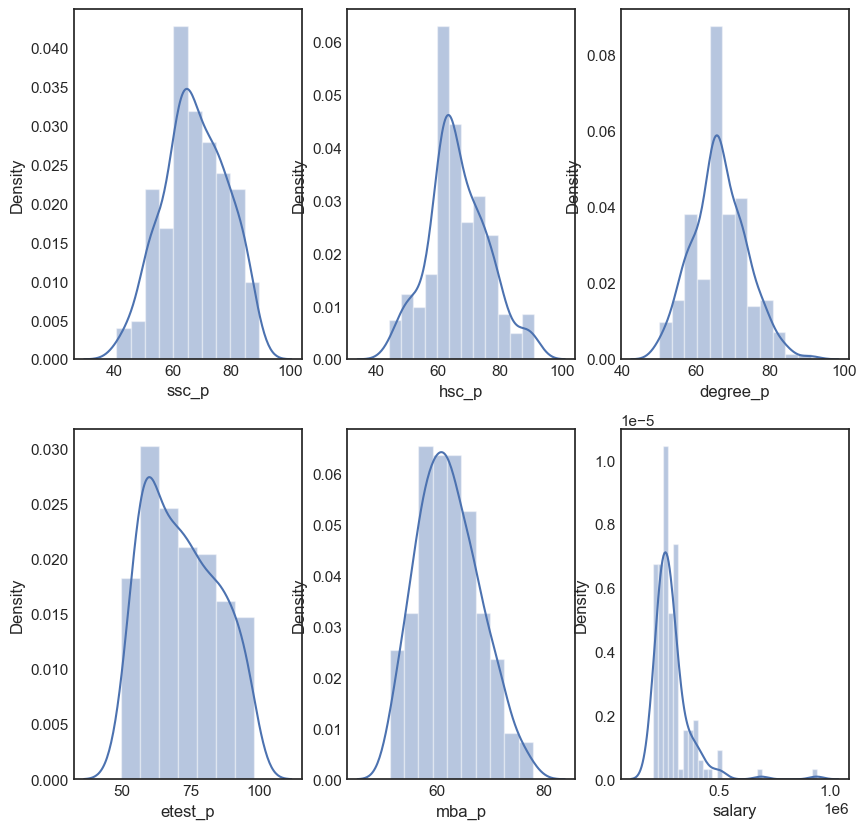

In [17]:
import warnings
warnings.simplefilter("ignore")

plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

plt.subplot(231)
sns.distplot(df_filter['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df_filter['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df_filter['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df_filter['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df_filter['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(df_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)




Inference

All the distributions follow normal distribution except salary feature

Most of the candidates educational performances are between 60-80%

Salary distribution got outliers where few have got salary of 7.5L and 10L PA

##### Work experience Vs Placement Status

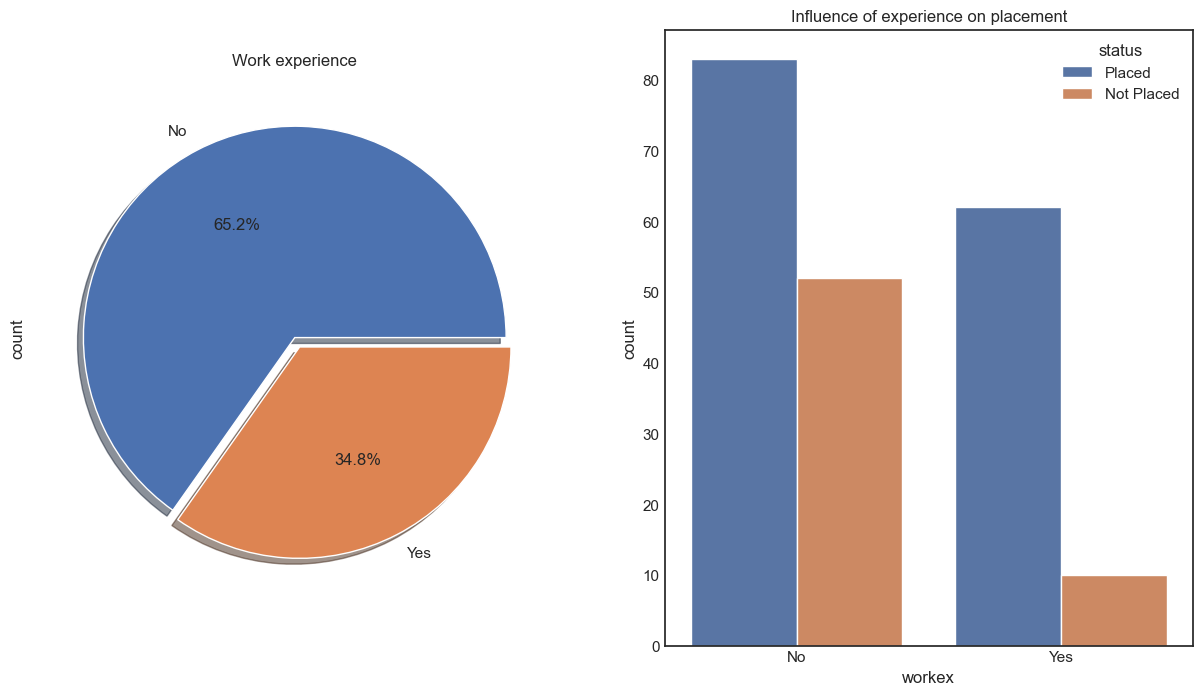

In [18]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(15,8))
df_filter['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = df_filter)
ax[1].set_title('Influence of experience on placement')
plt.show()

Inference

We have nearly 65.2% of candidates who never had any work experience

Candidates who never had work experience have got hired more than the ones who had experience

We can conclude that work experience doesn't influence a candidate in the recruitment process

##### MBA marks vs Placement Status- Does your academic score influence?

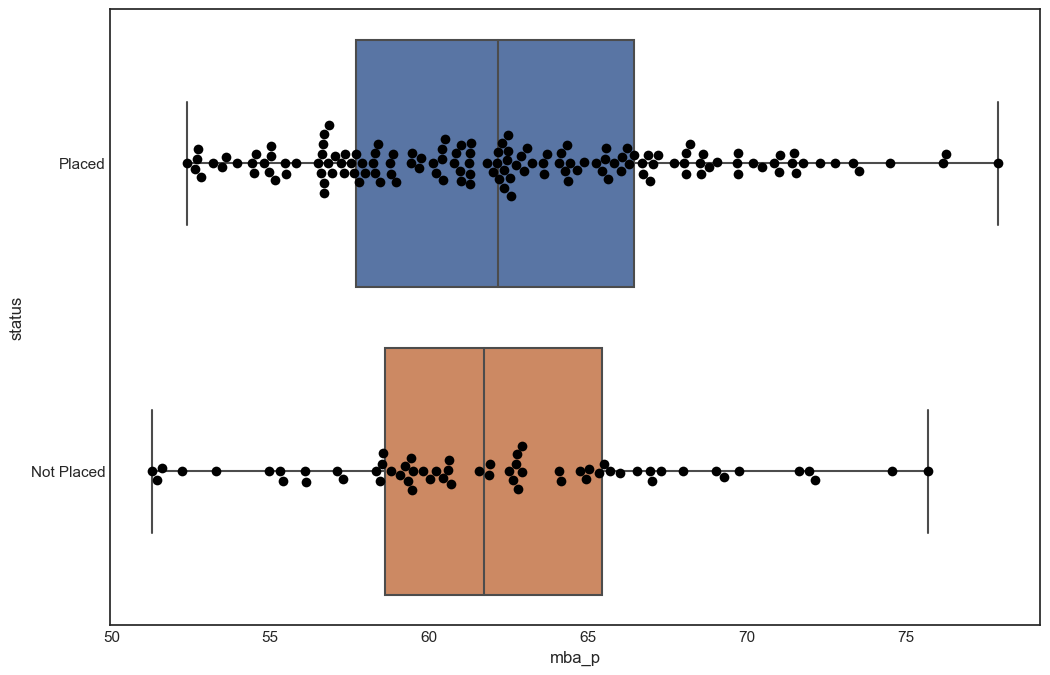

In [19]:
m=sns.boxplot(y = "status" , x ="mba_p" , data = df_filter , whis = np.inf ) 
#The boxplot provides summary statistics, such as quartiles and potential outliers
m=sns.swarmplot(y = "status",x = 'mba_p',data = df_filter, size = 7,color = 'black')
# the swarmplot shows individual data points
m.figure.set_size_inches(12,8)
plt.show()


Inference

Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand when it comes to numbers as you can see in the swarm. So as per the plot,percentage do influence the placement status

##### Coorelation between academic percentages

<Axes: >

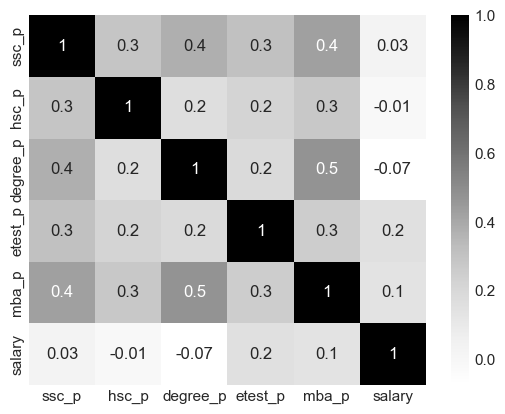

In [20]:
numeric_df = df_placed.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(),annot=True,fmt='.1g',cmap='Greys')

Inference

Candidates who were good in their academics performed well throughout school,undergrad,mba and even employability test

These percentages don't have any influence over their salary

##### Distribution of our data

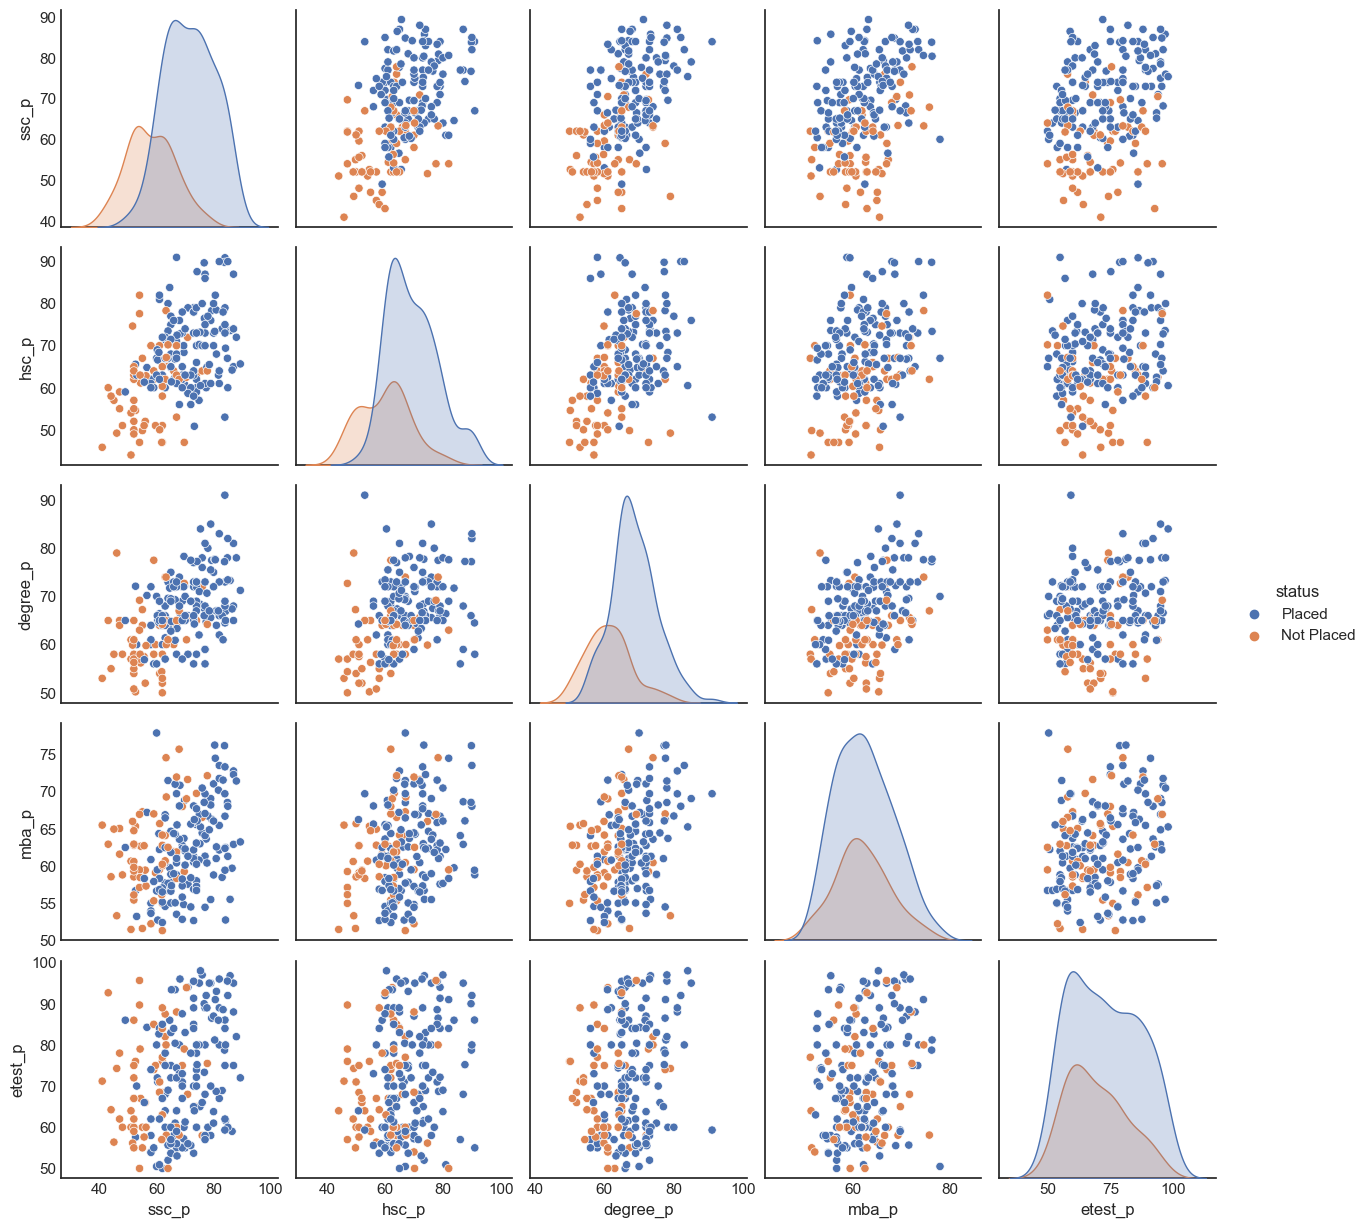

In [21]:
sns.pairplot(df_filter , vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'] , hue = 'status'  )

Inference

Candidates who has high score in higher secondary and undergrad got placed

Whomever got high scores in their schools got placed

Comparing the number of students who got placed candidates who got good mba percentage and employability percentage

### Data Preprocessing

Now let's welcome our data to the model.Before jumping onto creating models we have to prepare our dataset for the models. We dont have to perform imputation as we dont have any missing values but we have categorical variables which needs to be encoded.

##### Label Encoding
We have used label encoder function for the ordinal category 

In [38]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status' , 'hsc_s' , 'degree_t']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df_filter[col] = label_encoder.fit_transform(df_filter[col])

In [49]:
df_filter.head(5)


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [50]:

feature_cols=['gender','ssc_p','hsc_p','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p']         
len(feature_cols)


10

In [44]:
#Independent and dependent features
X =df_filter.drop(['status' , 'salary'] ,axis =1)
y=df_filter.status


In [45]:
X

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23


In [46]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 207, dtype: int64

##### Train and Test Split

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 10)
Input Test: (42, 10)
Output Training: (165,)
Output Test: (42,)


##### Machine Learning models

##### Logisitc Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


###### Confusion matrix and Classification report

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  5]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.84      0.96      0.90        27

    accuracy                           0.86        42
   macro avg       0.87      0.81      0.83        42
weighted avg       0.86      0.86      0.85        42



Insights:

The Confusion matrix result is telling us that we have 10+26 correct predictions and 1+5 incorrect predictions.


##### Decision Tree 

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7380952380952381


##### K Nearest Neighbours

In [57]:
#Choosing K value

from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

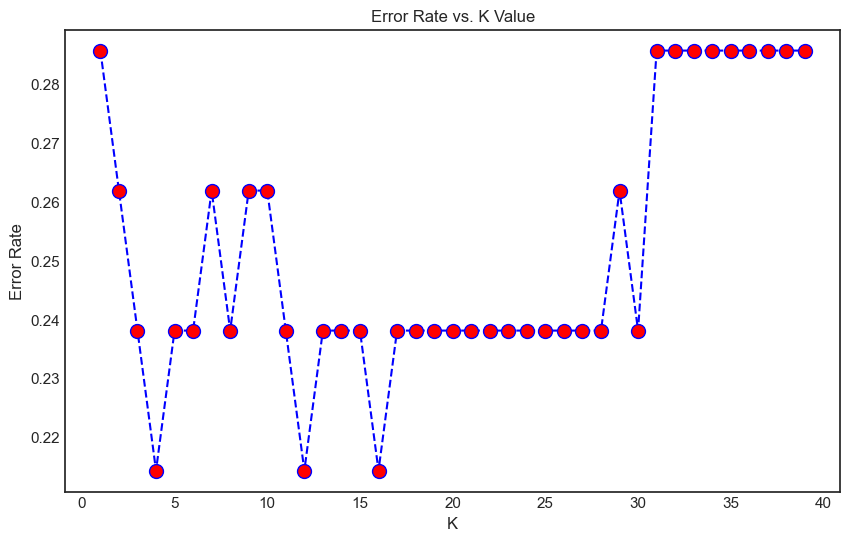

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

There are a lot of ups and downs in our graph. If we consider any value between 10-15 we may get an overfitted model. So let's stick onto the first trough. Our K value is 5

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7619047619047619
Confusion Matrix:
 [[ 6  9]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.40      0.55        15
           1       0.74      0.96      0.84        27

    accuracy                           0.76        42
   macro avg       0.80      0.68      0.69        42
weighted avg       0.78      0.76      0.73        42



Insights:

Our model has precisely classified 86% of Not placed categories and 74% of Placed categories

To talk in numbers 26+6 correct classifications and 1+9 false negative and false positive classification

We should be considering the precision value as our metric because the possibility of commiting False Positive is very crucial in recuritment

##### Naive Bayes Classifier with Cross Validation

In [59]:
#Importing and fitting

from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
  
#Applying and predicting 
y_pred = gnb.predict(X_test) 
cv_scores = cross_val_score(gnb, X, y, 
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: " , cv_scores.mean())

Cross-validation precision:  0.7386280038331122


##### Support Vector Machine

In [61]:
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[10  5]
 [ 2 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.83      0.93      0.88        27

    accuracy                           0.83        42
   macro avg       0.83      0.80      0.81        42
weighted avg       0.83      0.83      0.83        42



Inference

We have got 83% precision in classifying our model.
10+25 correctly classified and 2+5 wrongly classified( False Negative & False Positive)

###### From the analysis report on Campus Recruitment dataset here are my following conclusions

Educational percentages are highly influential for a candidate to get placed

Past work experience doesn't influence much on your masters final placements

There are no gender discrimination while hiring, but higher packages were given to male

Academic percentages have no relation towards salary package.